<a href="https://colab.research.google.com/github/sauravdey99/Logicmojo-AI-ML-Sept25-sauravdey/blob/main/BikeAssignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression,SGDRegressor

from sklearn.preprocessing import PolynomialFeatures,StandardScaler

from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score


In [ ]:
df = pd.read_csv("day.csv")

In [ ]:
df.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,6,06-01-2018,1,0,1,0,6,0,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,7,07-01-2018,1,0,1,0,0,0,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,8,08-01-2018,1,0,1,0,1,1,2,6.765000,8.11270,53.5833,17.875868,68,891,959
8,9,09-01-2018,1,0,1,0,2,1,1,5.671653,5.80875,43.4167,24.250650,54,768,822
9,10,10-01-2018,1,0,1,0,3,1,1,6.184153,7.54440,48.2917,14.958889,41,1280,1321


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [ ]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.drop(columns = ['instant','dteday','yr'],inplace = True)

In [ ]:
df.head(5)

,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,1,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,1,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,1,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,1,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   mnth        730 non-null    int64  
 2   holiday     730 non-null    int64  
 3   weekday     730 non-null    int64  
 4   workingday  730 non-null    int64  
 5   weathersit  730 non-null    int64  
 6   temp        730 non-null    float64
 7   atemp       730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  casual      730 non-null    int64  
 11  registered  730 non-null    int64  
 12  cnt         730 non-null    int64  
dtypes: float64(4), int64(9)
memory usage: 74.3 KB


In [ ]:
df.shape

(730, 13)

In [ ]:
df.corr()['cnt']

season        0.404584
mnth          0.278191
holiday      -0.068764
weekday       0.036183
workingday   -0.027640
weathersit   -0.295929
temp          0.627044
atemp         0.630685
hum          -0.098543
windspeed    -0.235132
casual        0.672123
registered    0.945411
cnt           1.000000
Name: cnt, dtype: float64

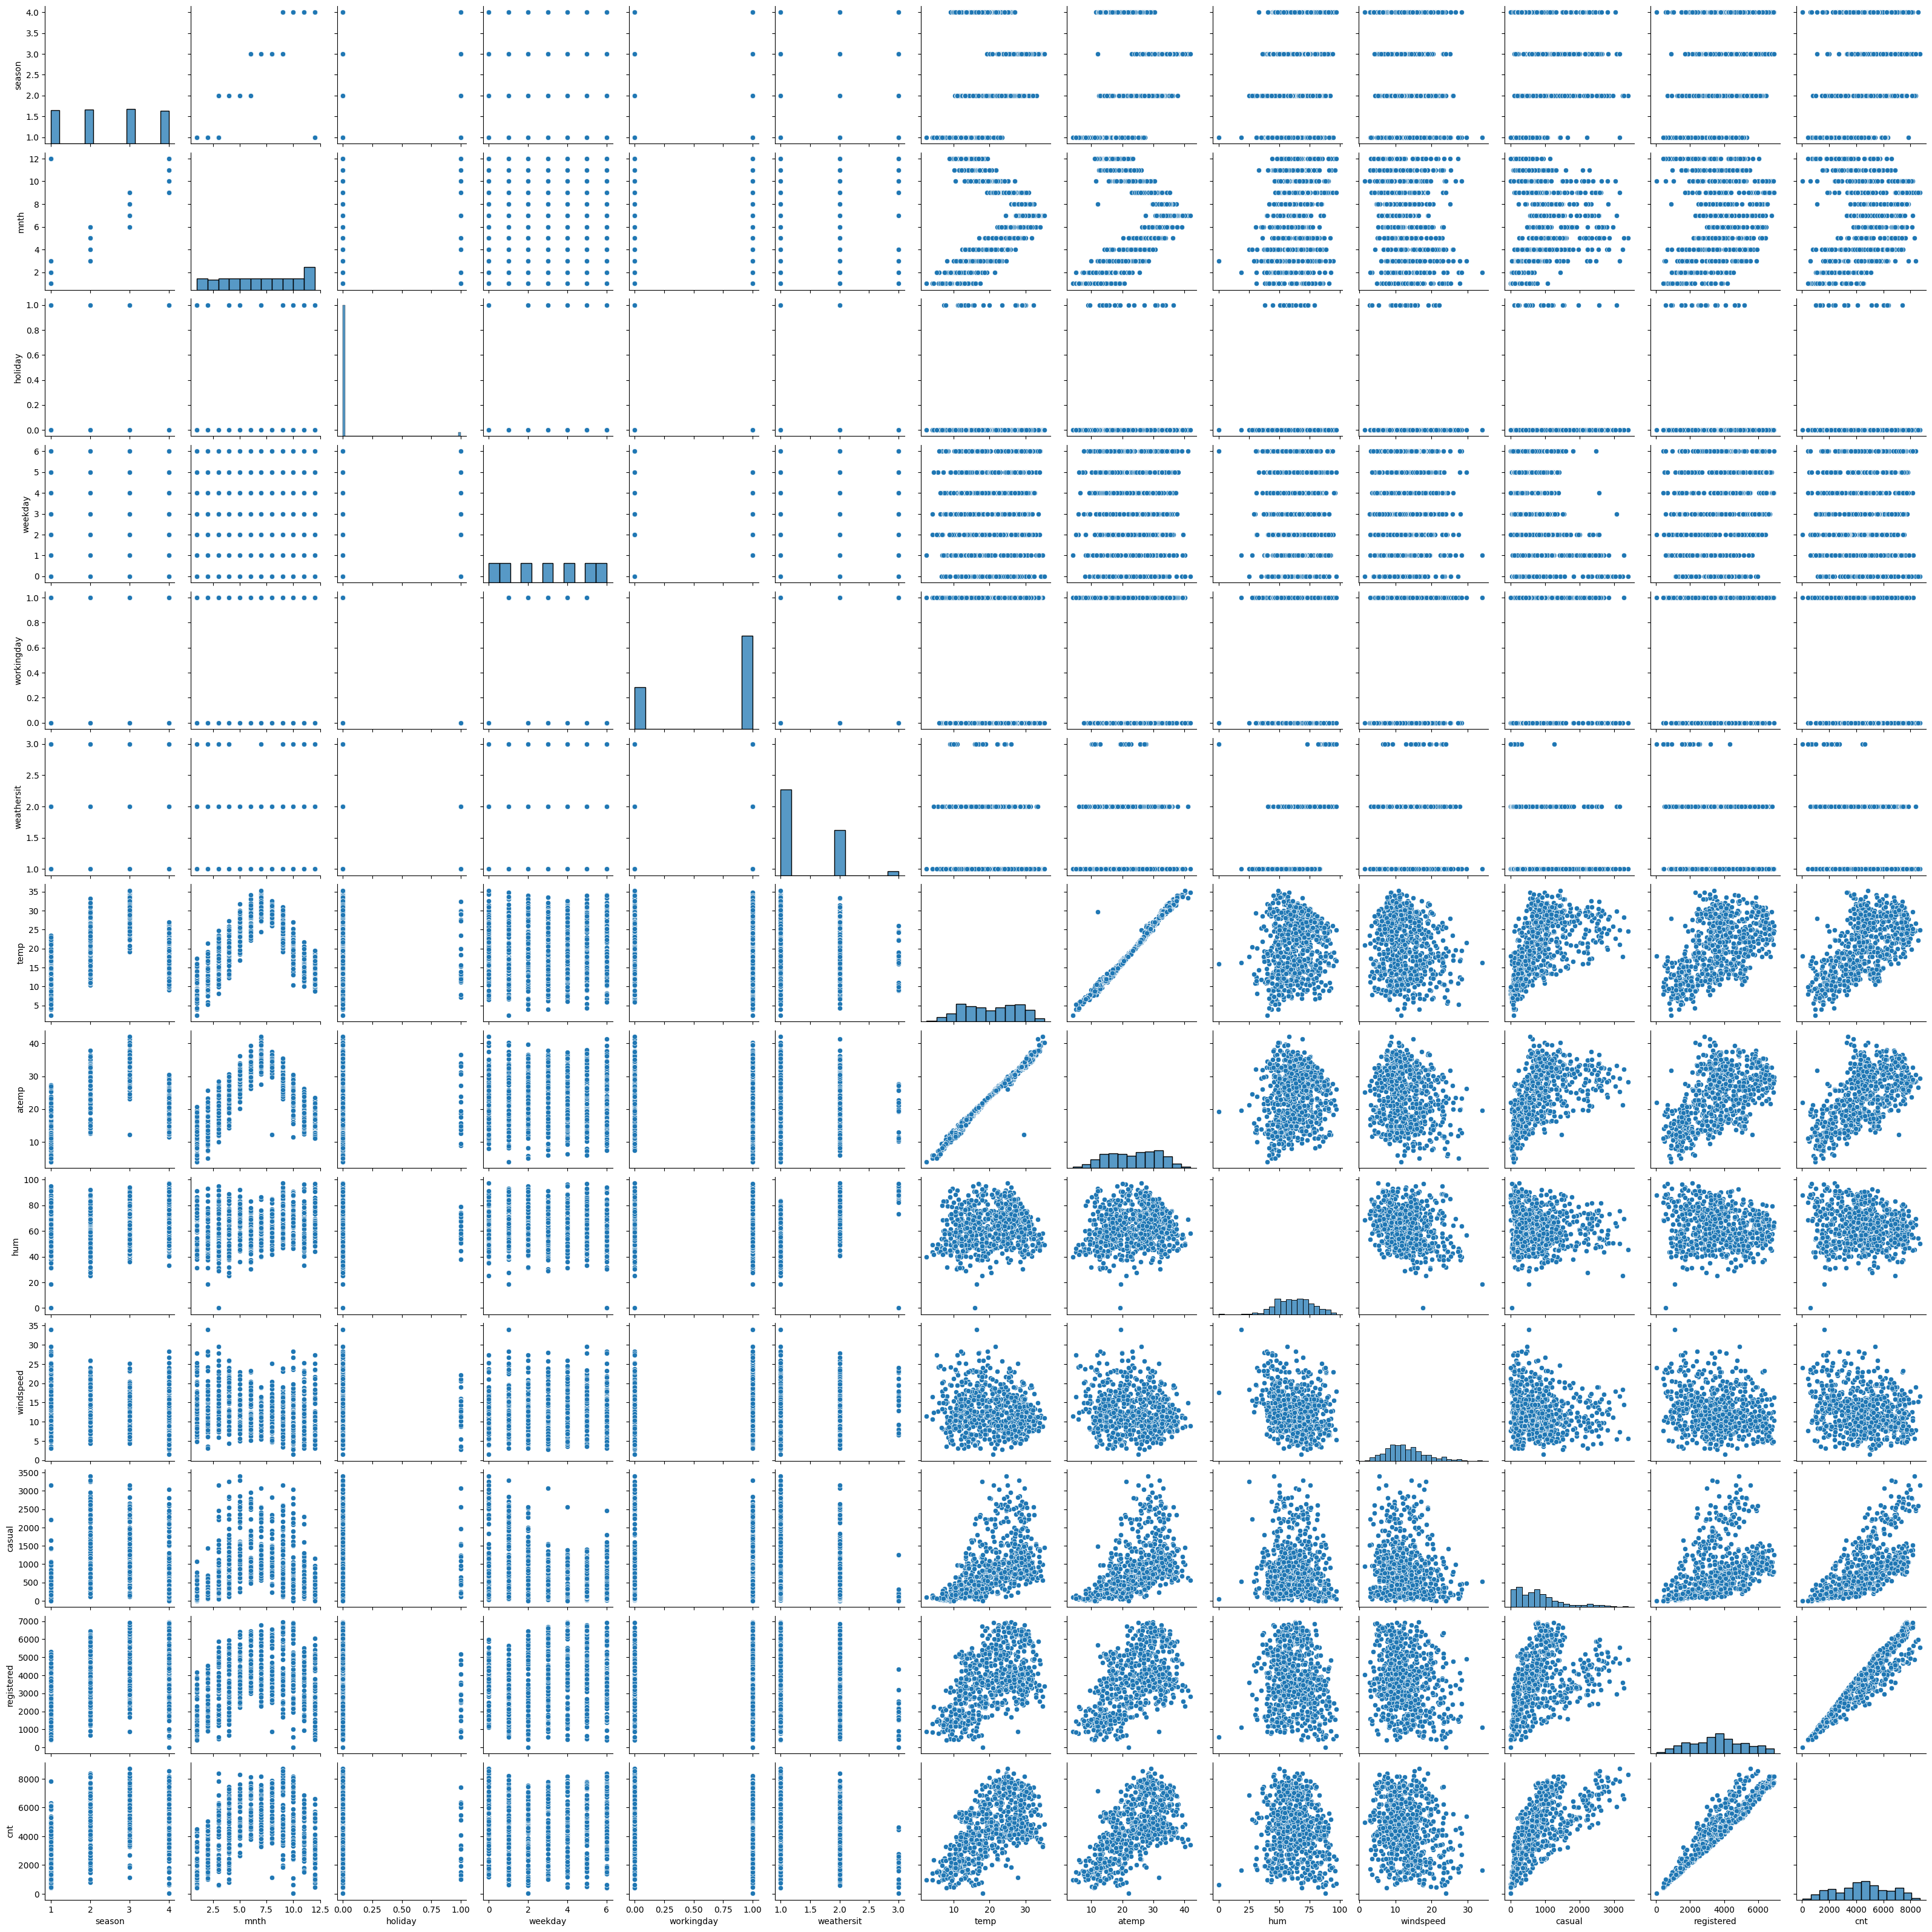

In [ ]:
sns.pairplot(df)

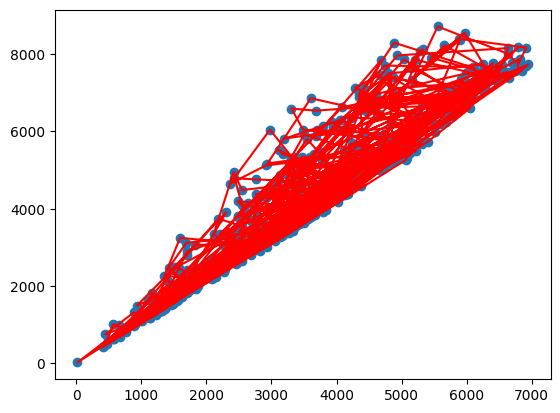

In [ ]:
plt.plot(df['registered'], df['cnt'],color = 'r')
plt.scatter(df['registered'],df['cnt'])


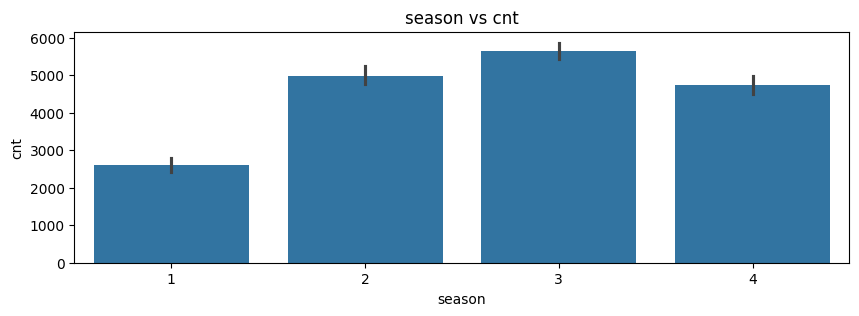

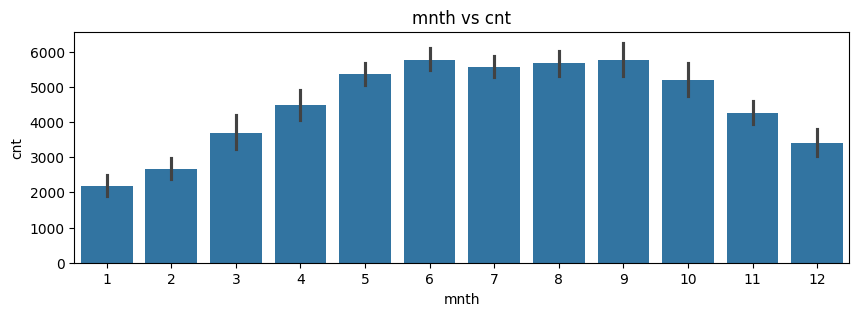

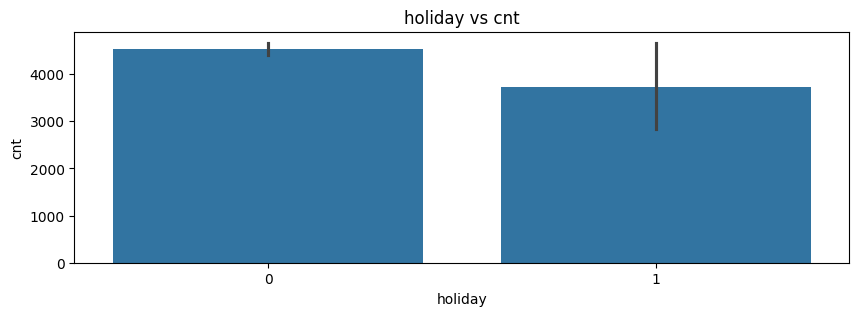

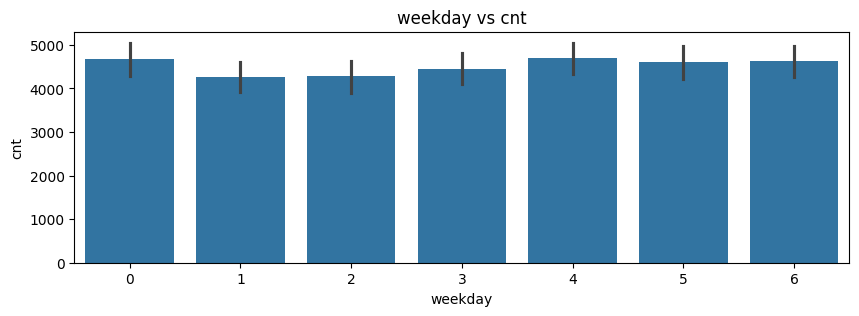

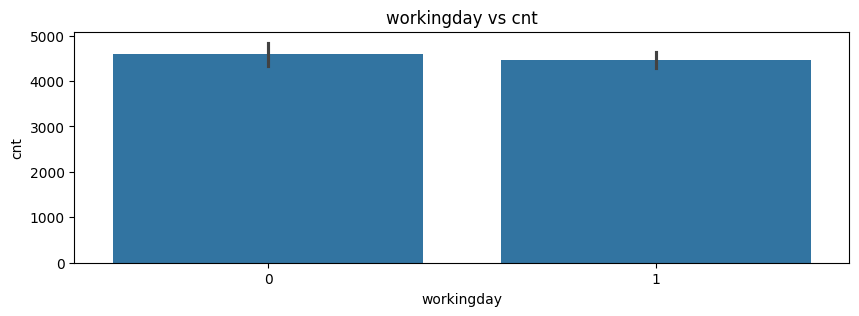

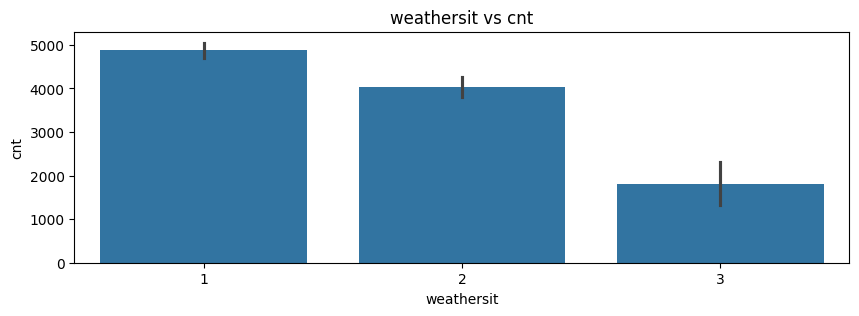

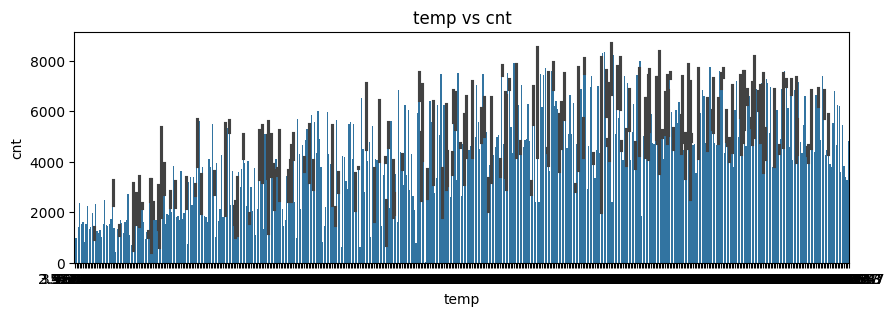

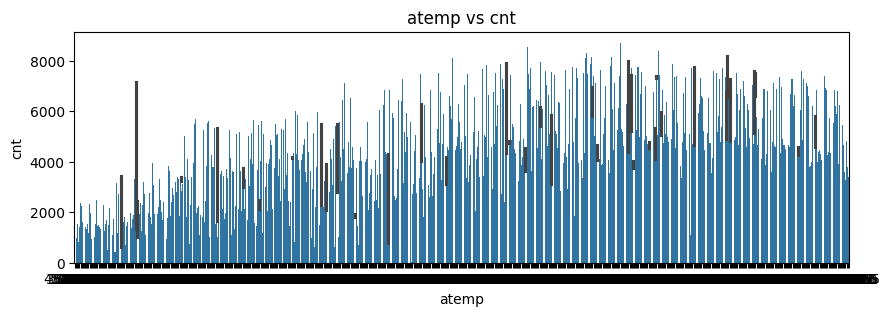

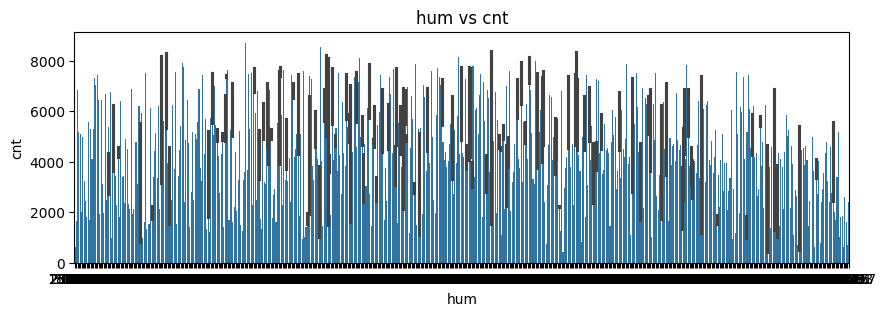

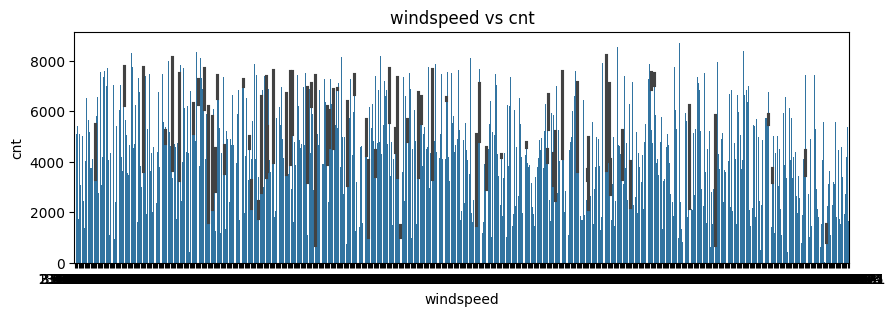

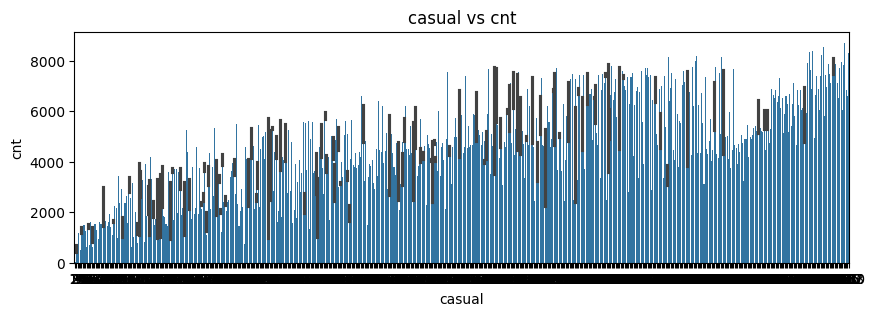

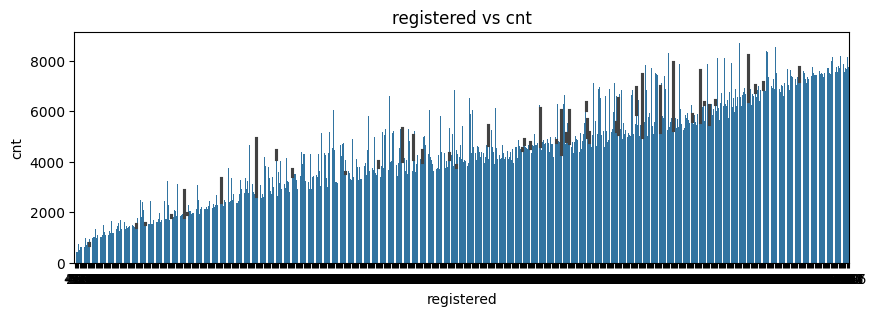

In [ ]:
for col in df.columns:
    if col != 'cnt':
        plt.figure(figsize=(10,3))
        sns.barplot(x=df[col], y=df['cnt'])
        plt.title(f"{col} vs cnt")
        plt.show()

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(df.drop('cnt',axis =1),df.iloc[:,-1:],test_size=0.3,random_state=3)

In [ ]:
sc = StandardScaler()
x_train_trans = sc.fit_transform(x_train)
x_test_trans = sc.transform(x_test)

In [ ]:
x_train_trans = pd.DataFrame(x_train_trans,columns=x_train.columns)
x_test_trans = pd.DataFrame(x_test_trans,columns=x_test.columns)

# Multiple linear Regression

In [ ]:
lr = LinearRegression()
lr.fit(x_train,y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [ ]:
y_pred = lr.predict(x_test)

In [ ]:
lr.coef_

array([[-4.83466250e-13,  2.76781317e-13,  9.35258533e-14,
         1.07548476e-14, -5.64295168e-14,  1.79266760e-13,
         1.89972545e-13, -1.37587230e-13, -7.97328706e-15,
        -1.24995038e-14,  1.00000000e+00,  1.00000000e+00]])

In [ ]:
lr.intercept_

array([9.09494702e-13])

In [ ]:
print("MAE =",mean_absolute_error(y_test, y_pred))
print("MSE =",mean_squared_error(y_test, y_pred))
print("r2 =",r2_score(y_test, y_pred))

MAE = 6.738151386422722e-13
MSE = 9.41791396626799e-25
r2 = 1.0


/var/folders/5l/q46c7s6j41l1b09g5fb89wlhpfwhsh/T/ipykernel_15625/1847588913.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test - y_pred), bins = 20)


<Axes: ylabel='Density'>

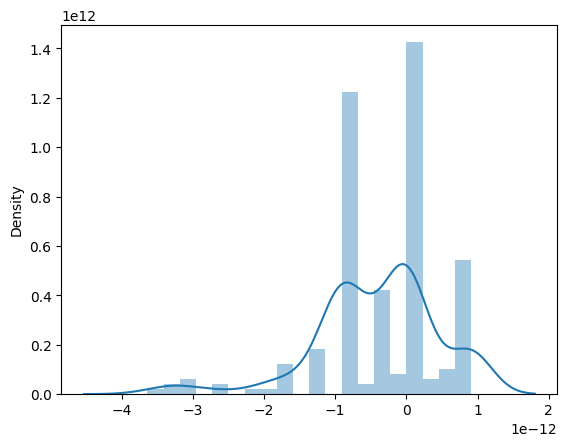

In [ ]:
sns.distplot((y_test - y_pred), bins = 20)

# After

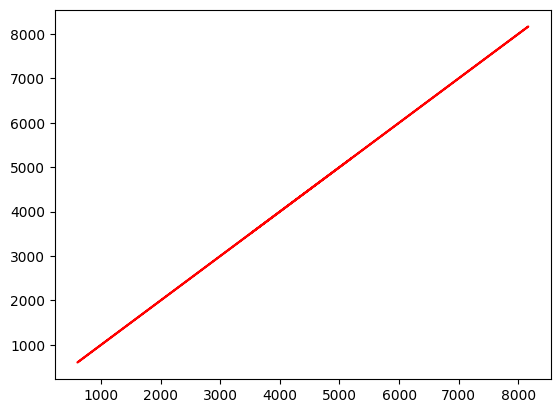

In [ ]:
plt.plot(y_test,y_pred,c = 'r')

In [ ]:
y_predDf = pd.DataFrame(y_pred,columns=y_test.columns)

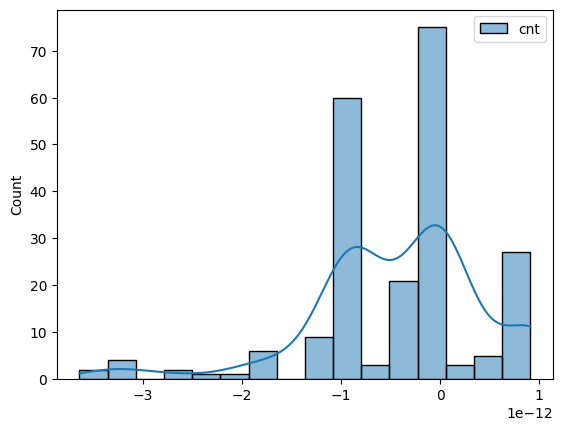

In [ ]:
sns.histplot(y_test - y_pred,kde = True)
plt.show()

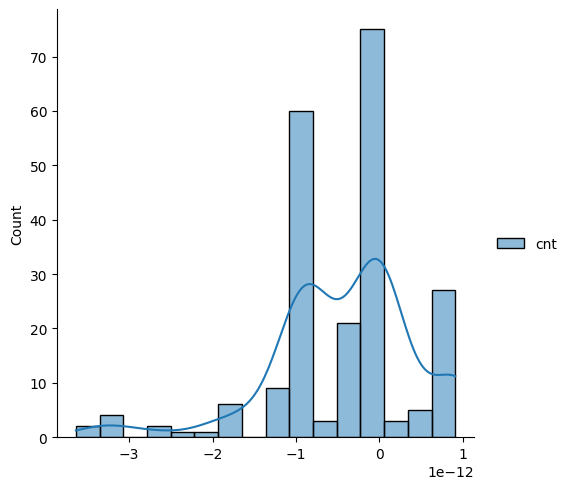

In [ ]:
residuals = y_test - y_pred

sns.displot(residuals,kde = True)
plt.show()

# Using OLS Method

In [ ]:
import statsmodels.api as sm
x_train_C = sm.add_constant(x_train)
model = sm.OLS(y_train,x_train_C).fit()

In [ ]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.480e+31
Date:                Sat, 27 Dec 2025   Prob (F-statistic):               0.00
Time:                        00:30:04   Log-Likelihood:                 13120.
No. Observations:                 511   AIC:                        -2.621e+04
Df Residuals:                     498   BIC:                        -2.616e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -1.76e-12   6.04e-13     -2.911      0.0

In [ ]:
y_pred_train = model.predict(x_train_C)

In [ ]:
type(y_pred)

numpy.ndarray

In [ ]:
y_pred_train = pd.DataFrame(y_pred_train,columns=y_train.columns)

/var/folders/5l/q46c7s6j41l1b09g5fb89wlhpfwhsh/T/ipykernel_15625/3225008599.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_train - y_pred_train), bins = 20)


<Axes: ylabel='Density'>

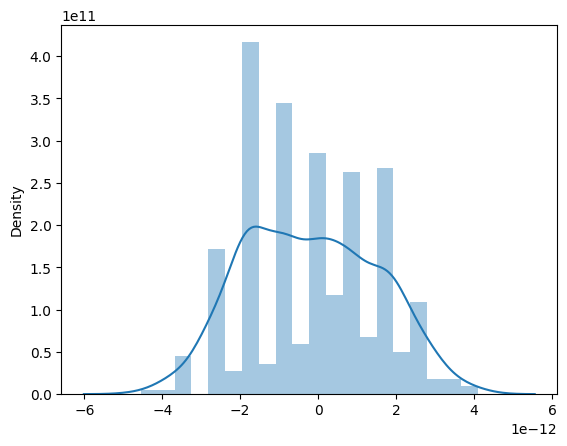

In [ ]:
sns.distplot((y_train - y_pred_train), bins = 20)

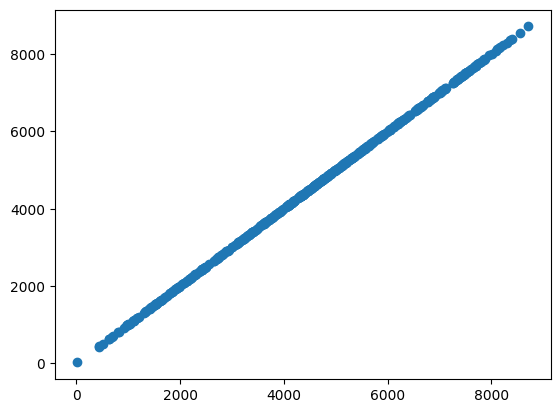

In [ ]:
plt.scatter(y_train, y_pred_train)